In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [425]:
# We are reading our data
df = pd.read_csv("C:/Users/Kaushal Gangwar/Desktop/Btech/Sem V/CSE2001- Object Oriented Programming with C++/Projects/heart failure/heart_failure_clinical_records_dataset.csv")
# First 5 rows of our data
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [426]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

C:\Users\Kaushal Gangwar\AppData\Local\Temp\ipykernel_25976\3008386061.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DEATH_EVENT", data=df, palette="bwr")


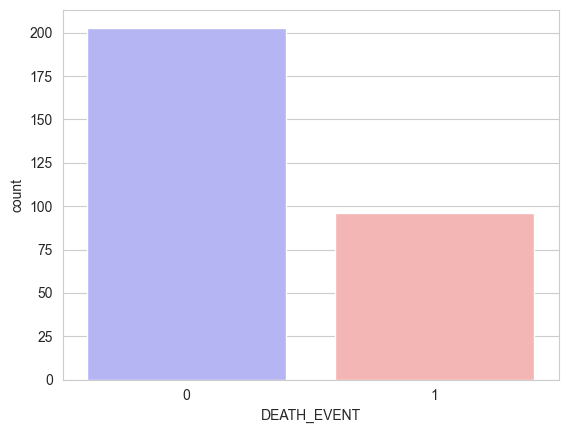

In [427]:
sns.countplot(x="DEATH_EVENT", data=df, palette="bwr")
plt.show()

In [428]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 35.12%
Percentage of Male Patients: 64.88%


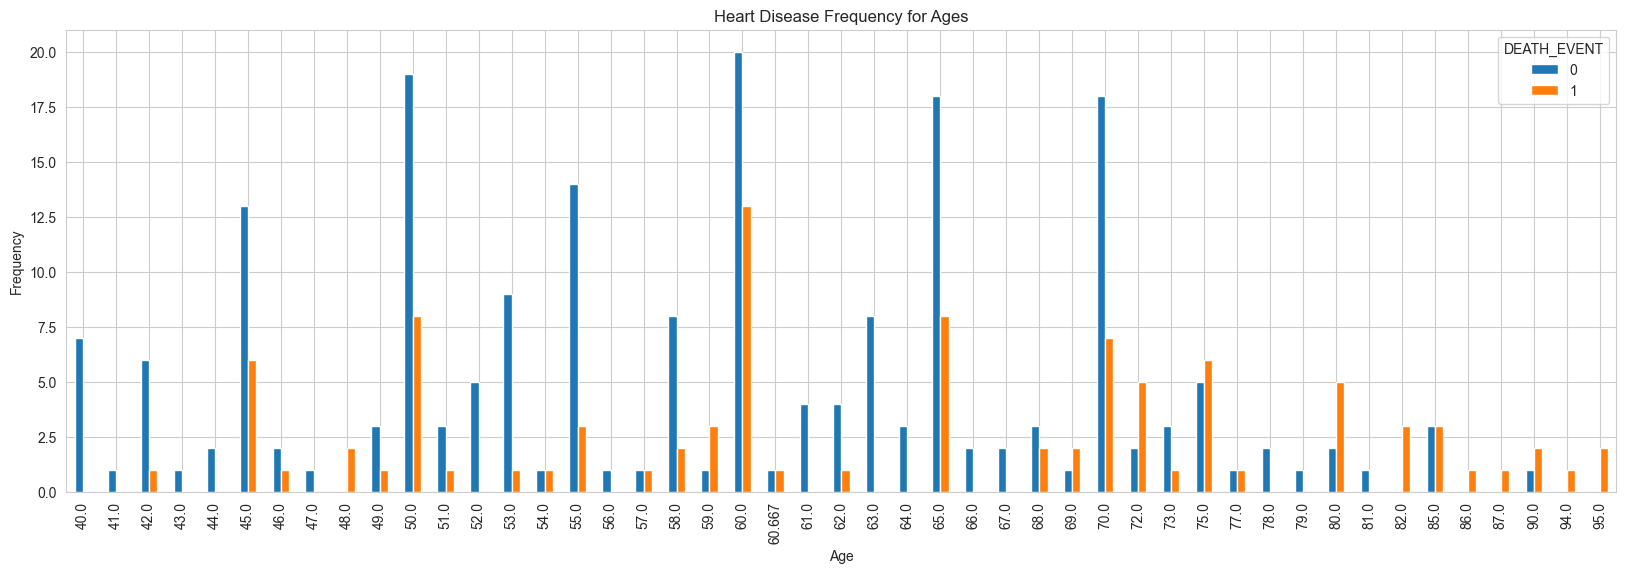

In [429]:
pd.crosstab(df.age,df.DEATH_EVENT).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

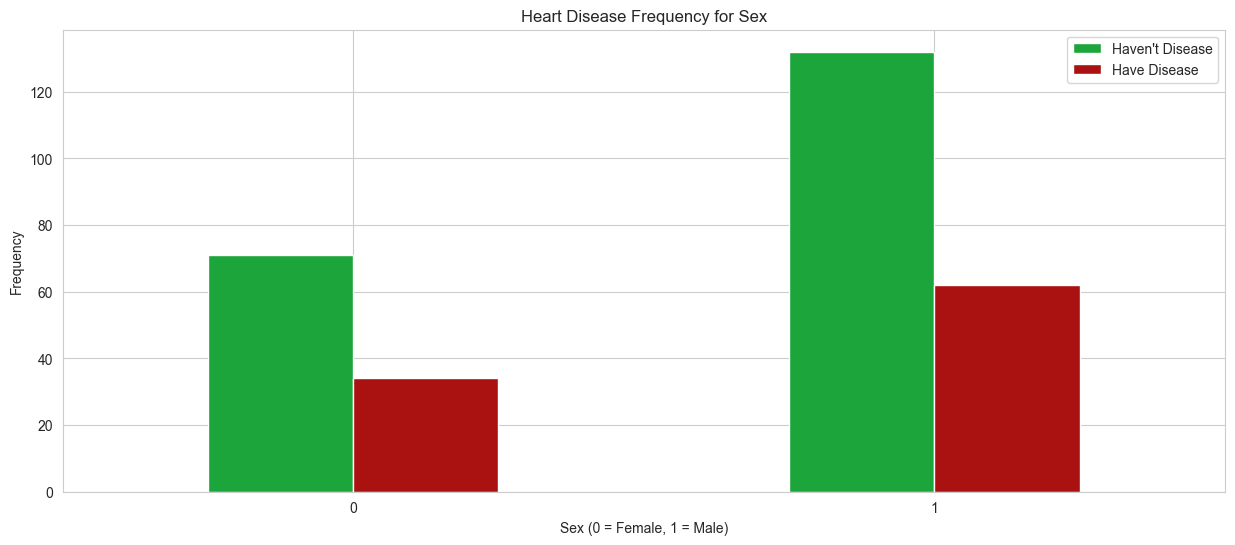

In [430]:
pd.crosstab(df.sex,df.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [431]:
# creating dummy variables
a = pd.get_dummies(df['ejection_fraction'], prefix = "ejection_fraction")
b = pd.get_dummies(df['time'], prefix = "time")
c = pd.get_dummies(df['anaemia'], prefix = "anaemia")
d = pd.get_dummies(df['creatinine_phosphokinase'], prefix = "creatinine_phosphokinase")
e = pd.get_dummies(df['platelets'], prefix = "platelets")
f = pd.get_dummies(df['serum_sodium'], prefix = "serum_sodium")
g = pd.get_dummies(df['diabetes'], prefix = "diabetes")
h = pd.get_dummies(df['smoking'], prefix = "smoking")

frames = [df, a, b, c, d, e, f, g, h]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['ejection_fraction', 'time', 'anaemia', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'diabetes', 'smoking'])

In [432]:
y = df.DEATH_EVENT.values
x_data = df.drop(['DEATH_EVENT'], axis = 1)

In [433]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [434]:
# We will split our data. 80% of our data will be train data and 20% of it will be test data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [435]:
#Let’s say weight = 0.01 and bias = 0.0
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [436]:
#Sigmoid Function
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

iteration: 100
cost: 0.6944615065892554


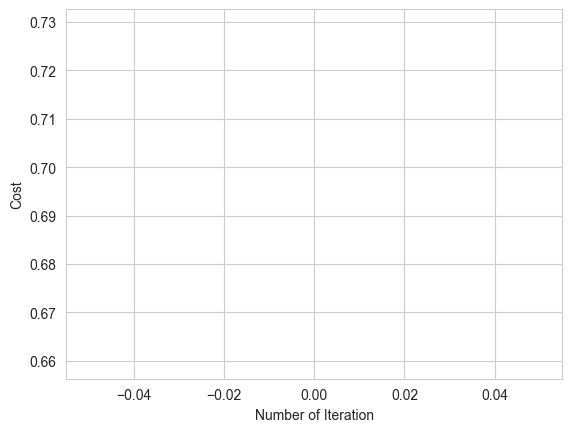

iteration: 100
cost: 0.6522887258655498


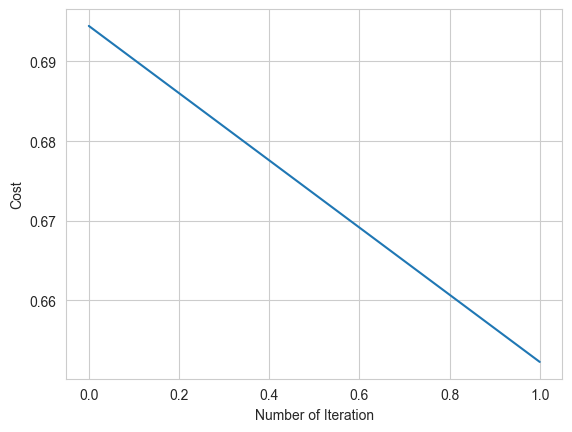

iteration: 100
cost: 0.6344016133826373


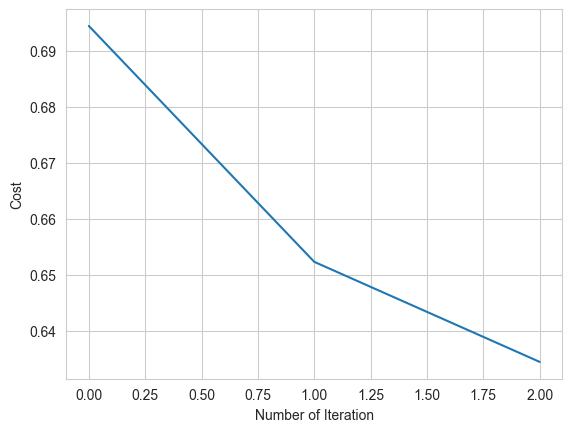

iteration: 100
cost: 0.6265459009088713


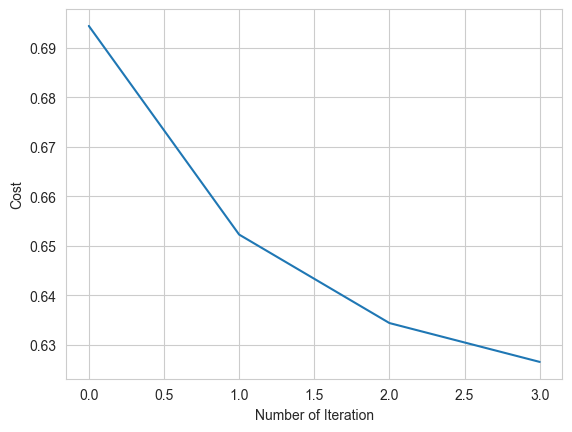

iteration: 100
cost: 0.622945487496727


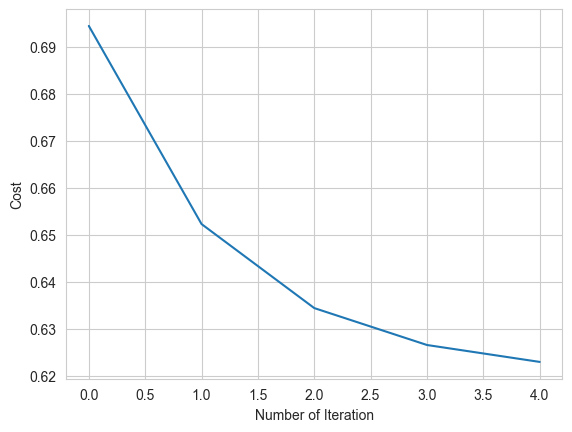

iteration: 100
cost: 0.6212115732397915


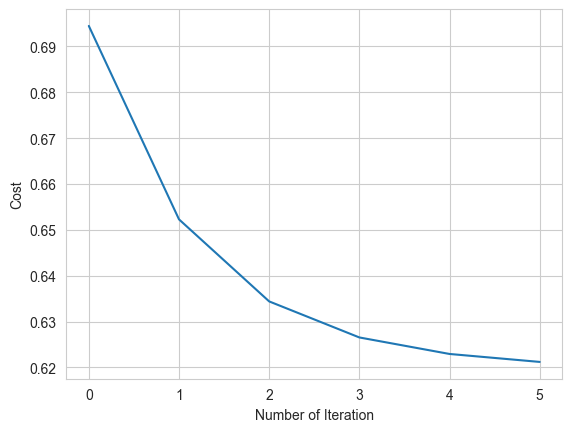

iteration: 100
cost: 0.6203198774268318


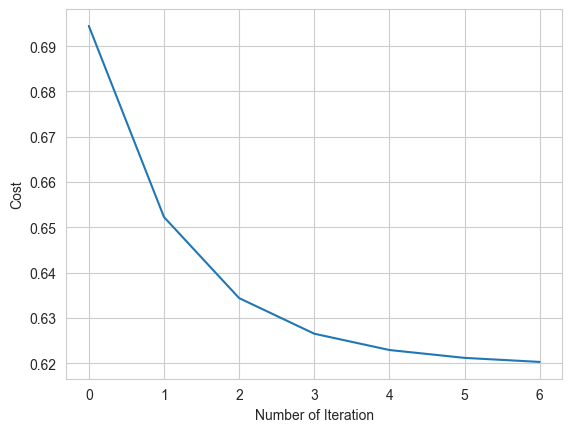

iteration: 100
cost: 0.6198165525948486


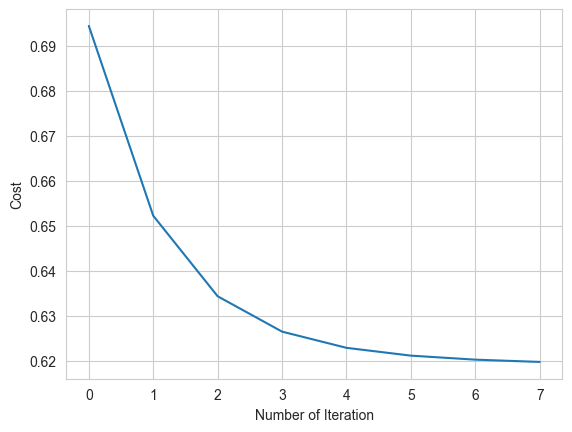

iteration: 100
cost: 0.6194952802117016


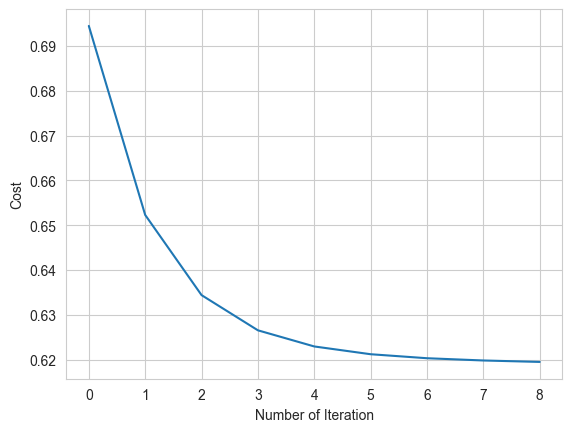

iteration: 100
cost: 0.6192604747872474


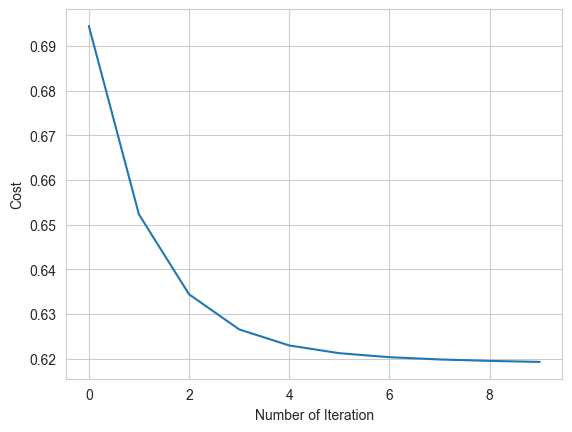

iteration: 100
cost: 0.6190672445580712


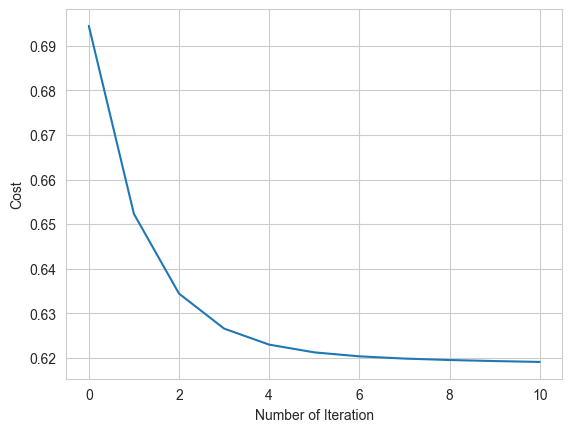

iteration: 100
cost: 0.6188943006851014


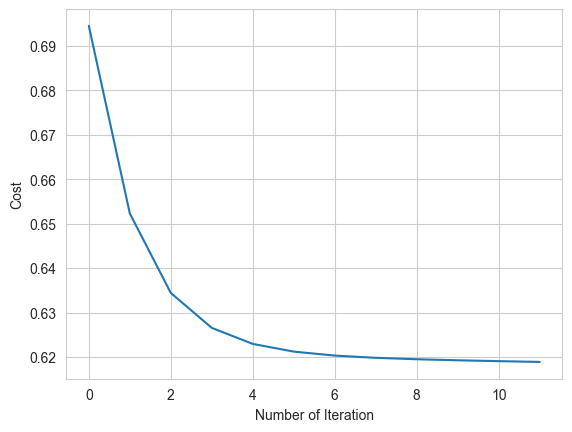

iteration: 100
cost: 0.6187314778244872


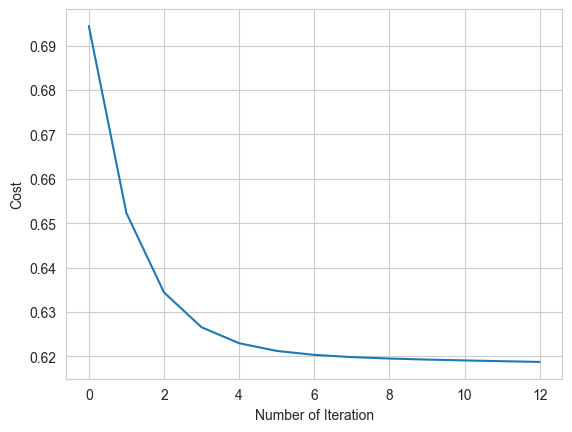

iteration: 100
cost: 0.6185738981348679


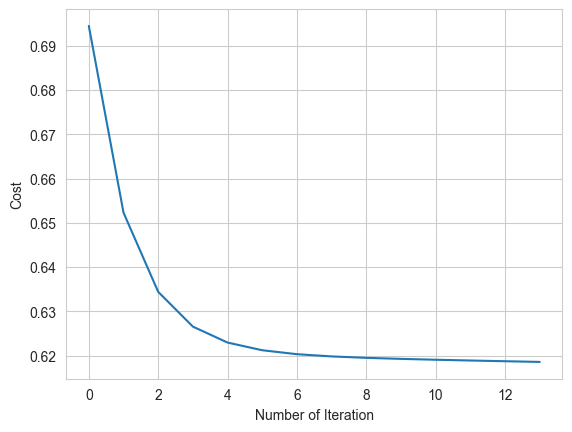

iteration: 100
cost: 0.6184192124178651


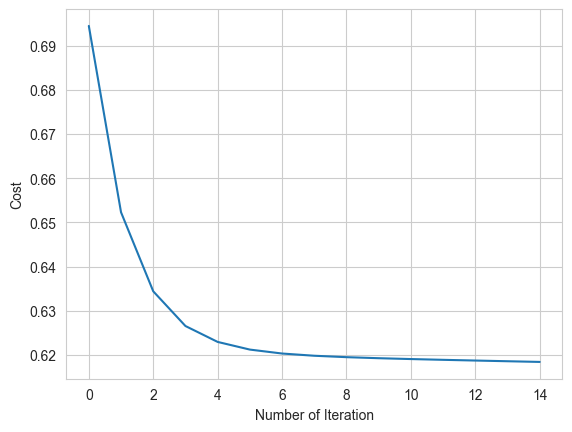

iteration: 100
cost: 0.6182662858761481


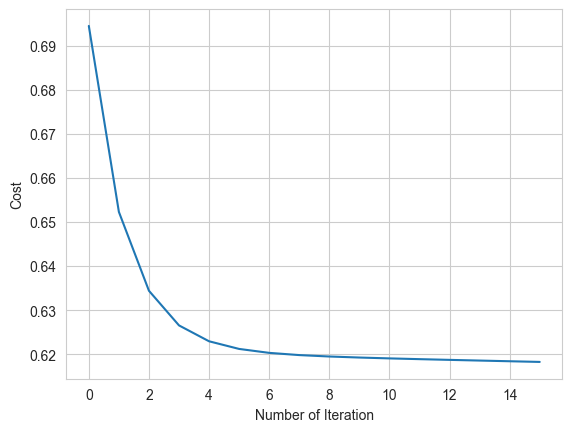

iteration: 100
cost: 0.6181145686567064


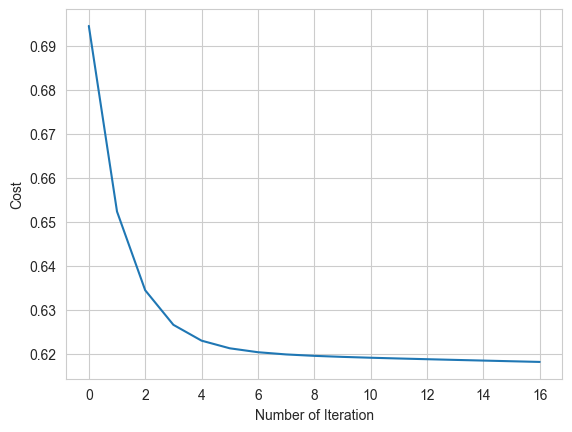

iteration: 100
cost: 0.6179637932317746


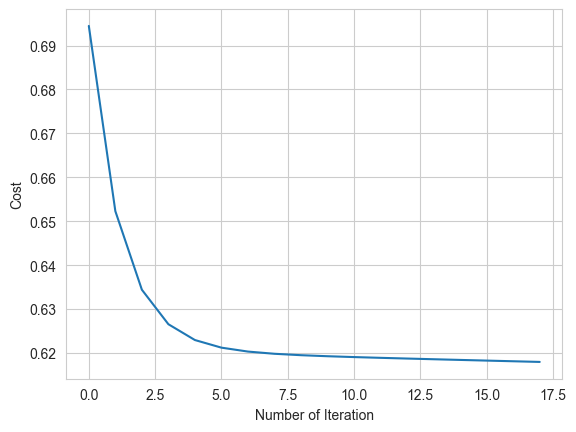

iteration: 100
cost: 0.6178138285289024


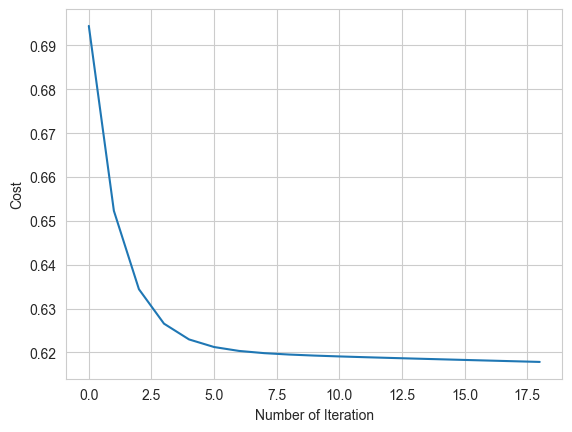

iteration: 100
cost: 0.6176646094909616


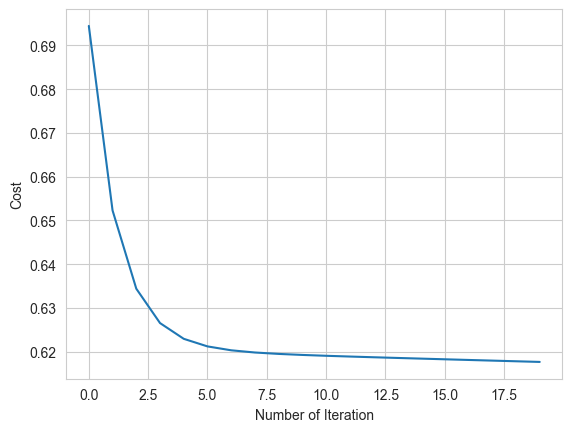

iteration: 100
cost: 0.6175161030192919


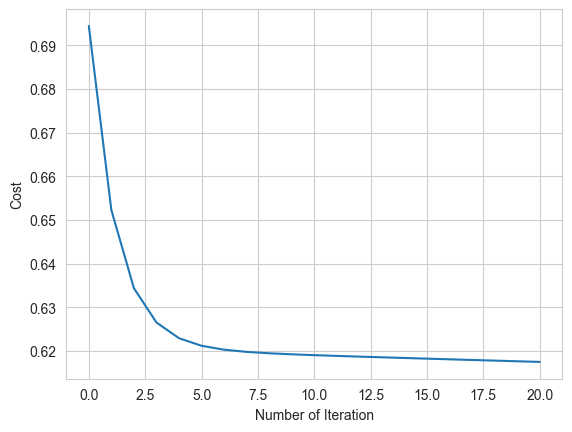

iteration: 100
cost: 0.617368291494342


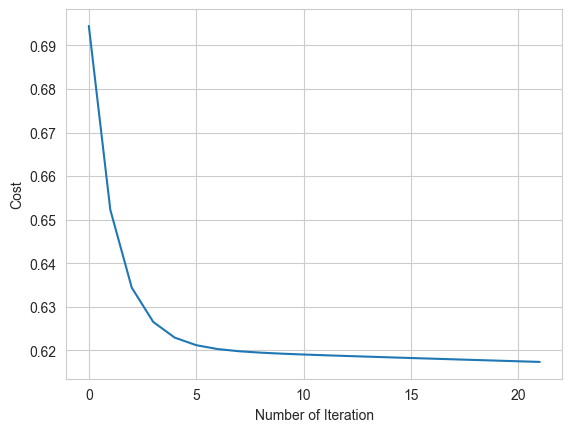

iteration: 100
cost: 0.6172211647976794


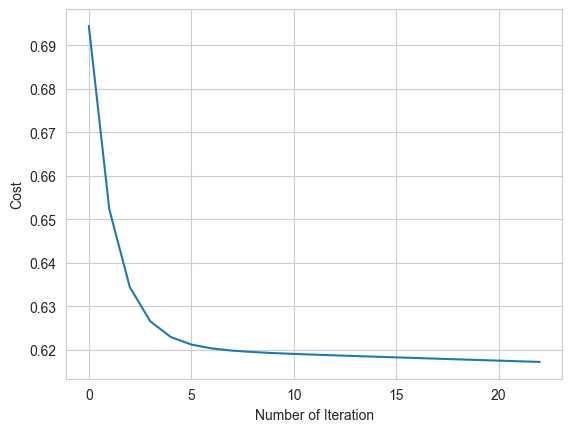

iteration: 100
cost: 0.617074716448659


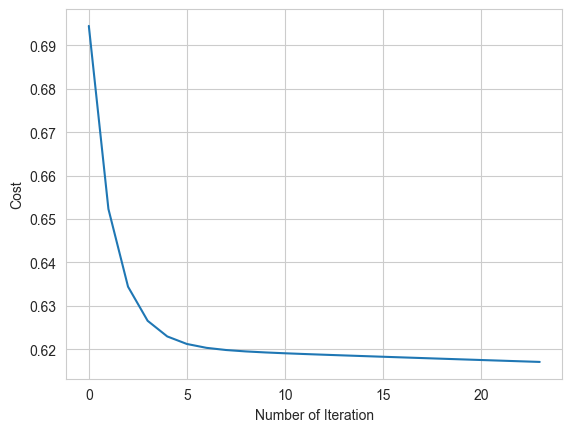

iteration: 100
cost: 0.6169289417334765


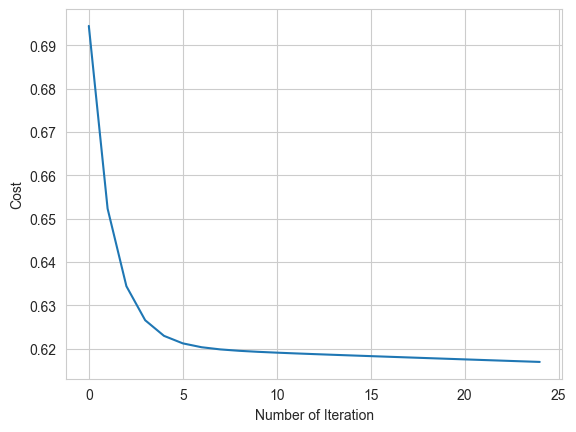

iteration: 100
cost: 0.6167838367991946


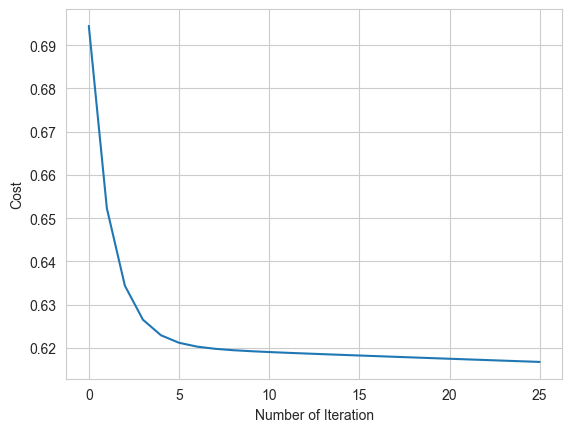

iteration: 100
cost: 0.6166393982151697


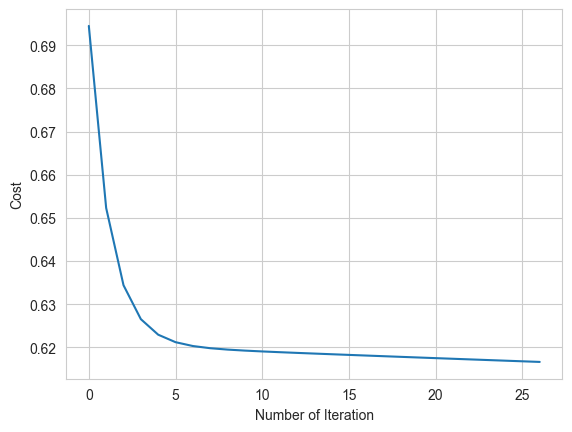

iteration: 100
cost: 0.6164956227608461


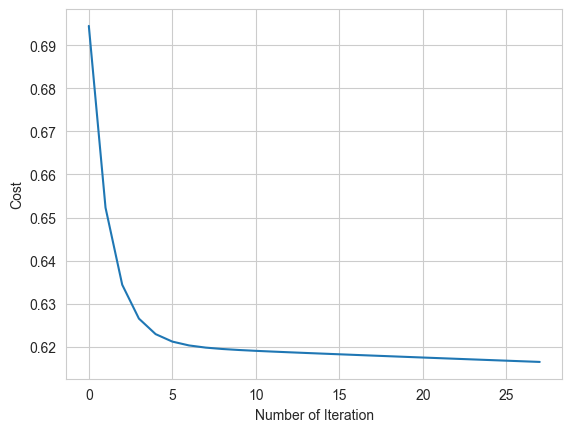

iteration: 100
cost: 0.6163525073231579


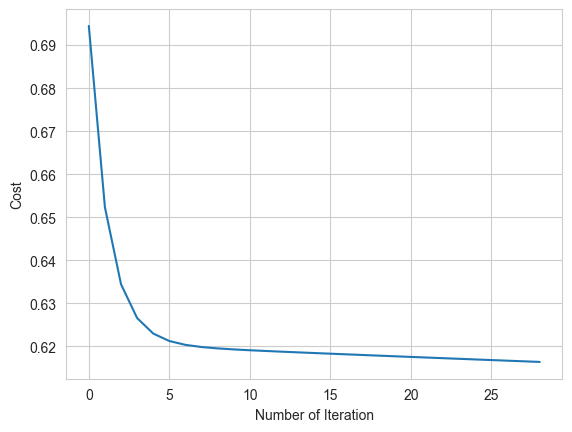

iteration: 100
cost: 0.6162100488469764


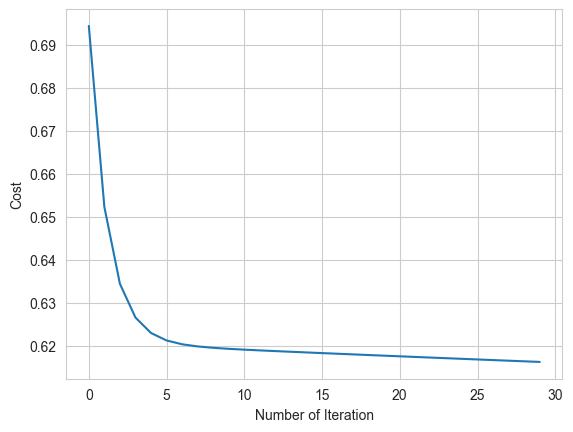

iteration: 100
cost: 0.6160682443112138


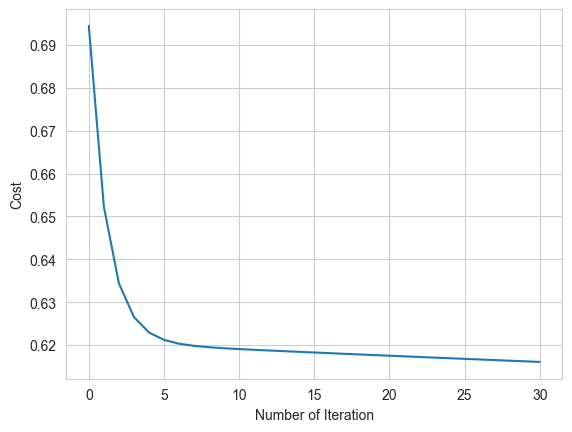

iteration: 100
cost: 0.6159270907173198


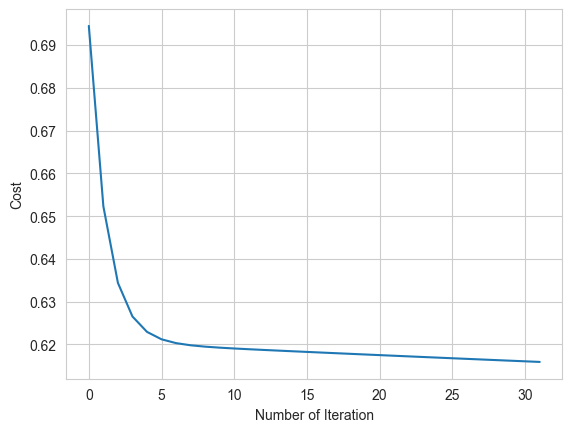

iteration: 100
cost: 0.6157865850837594


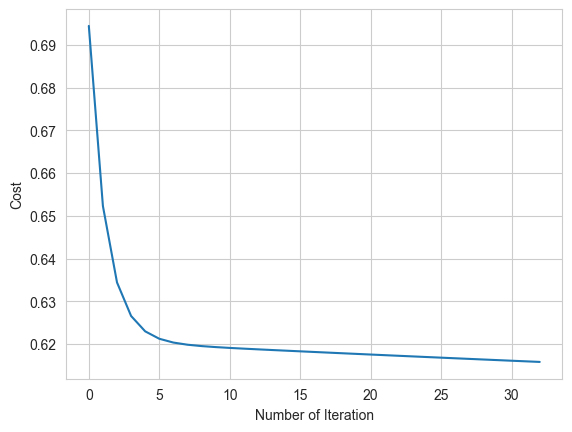

iteration: 100
cost: 0.6156467244433663


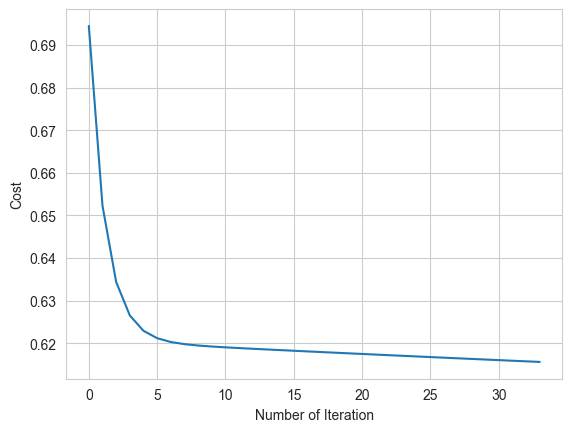

iteration: 100
cost: 0.6155075058420796


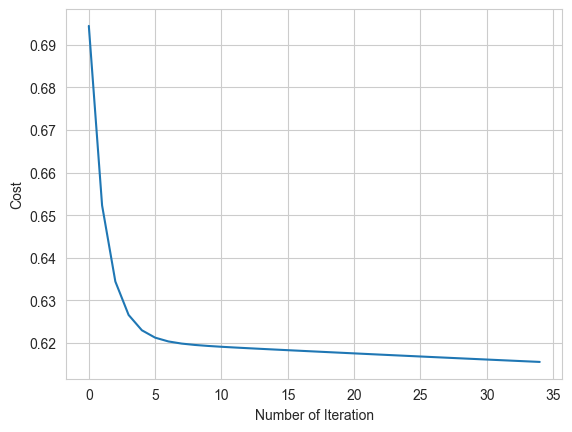

iteration: 100
cost: 0.6153689263383364


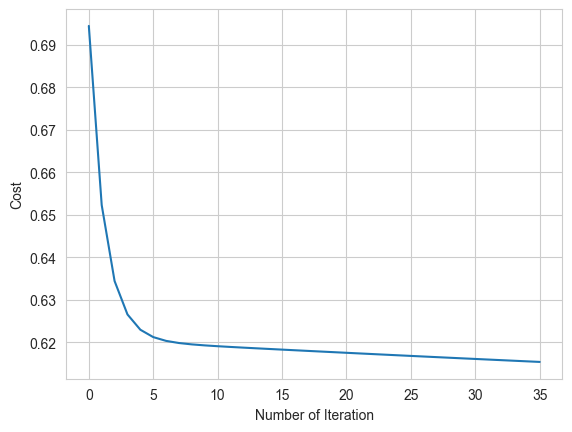

iteration: 100
cost: 0.6152309830027812


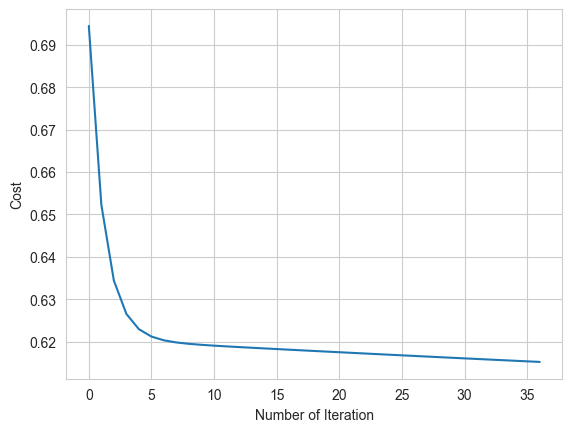

iteration: 100
cost: 0.6150936729181179


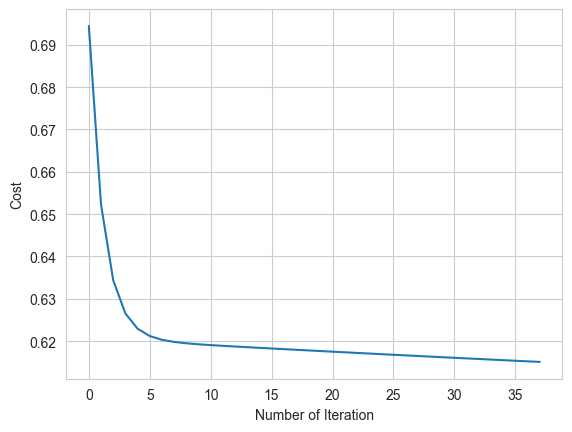

iteration: 100
cost: 0.6149569931790327


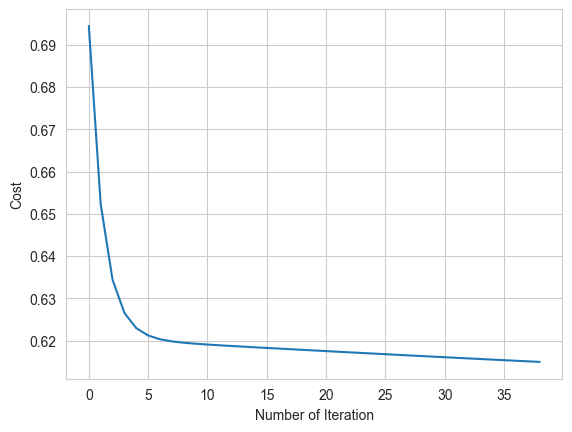

iteration: 100
cost: 0.6148209408921458


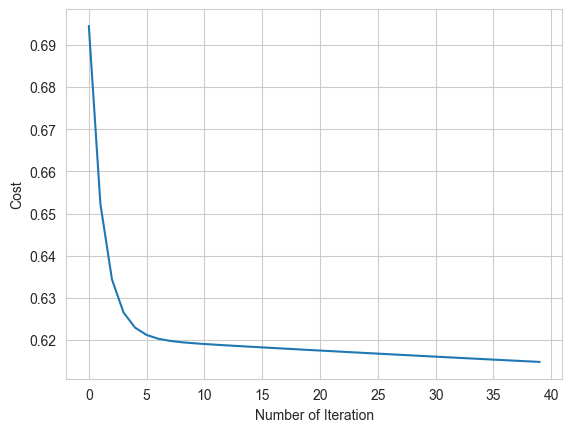

iteration: 100
cost: 0.614685513175976


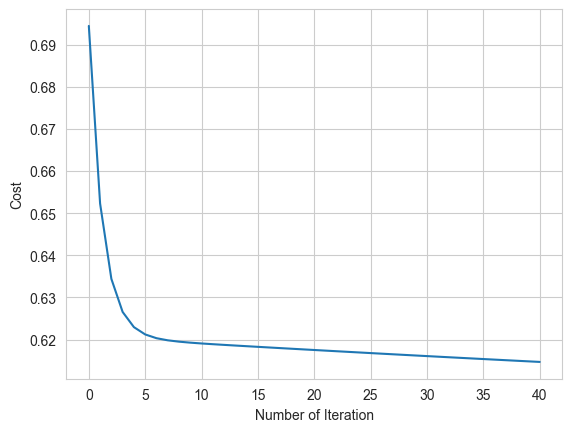

iteration: 100
cost: 0.6145507071609118


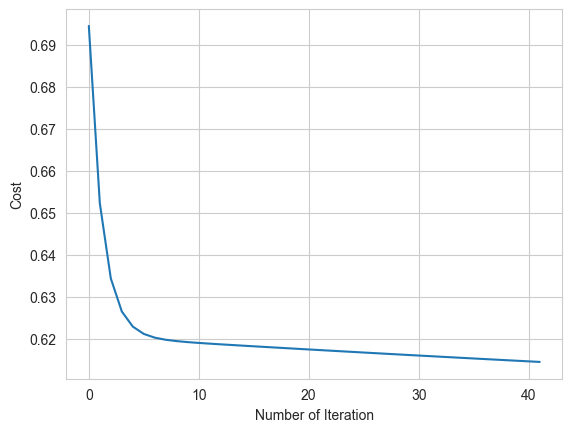

iteration: 100
cost: 0.6144165199891825


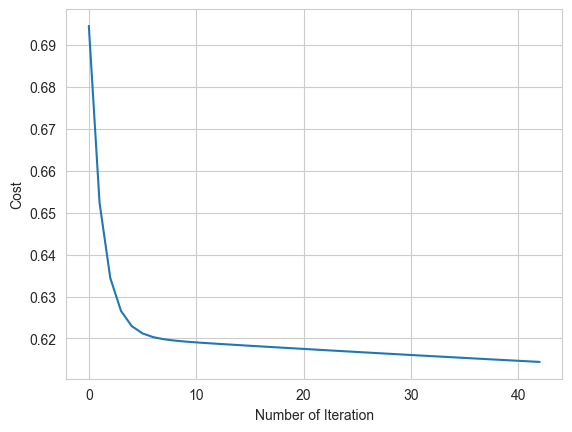

iteration: 100
cost: 0.6142829488148305


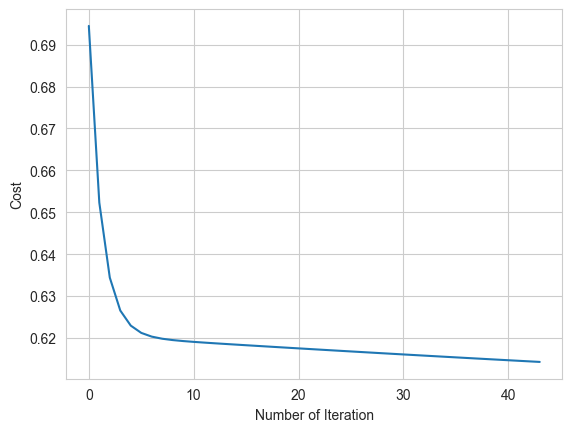

iteration: 100
cost: 0.6141499908036838


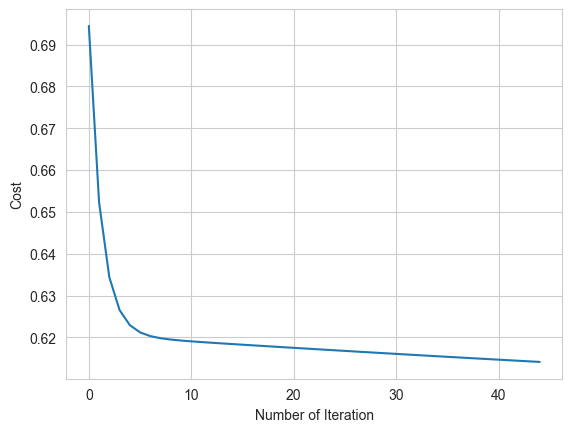

iteration: 100
cost: 0.6140176431333259


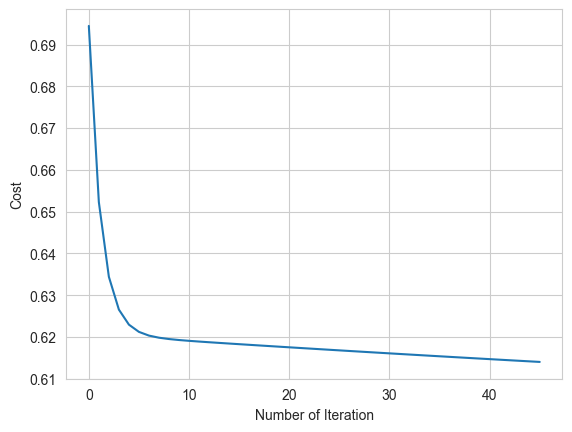

iteration: 100
cost: 0.6138859029930677


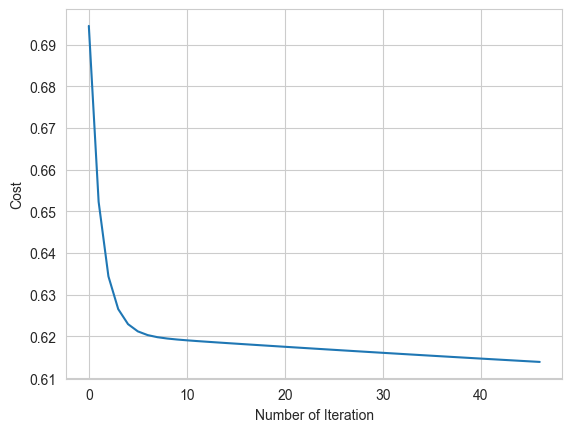

iteration: 100
cost: 0.6137547675839164


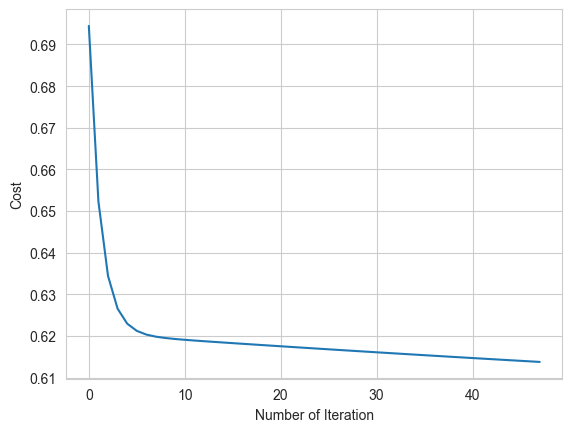

iteration: 100
cost: 0.6136242341185476


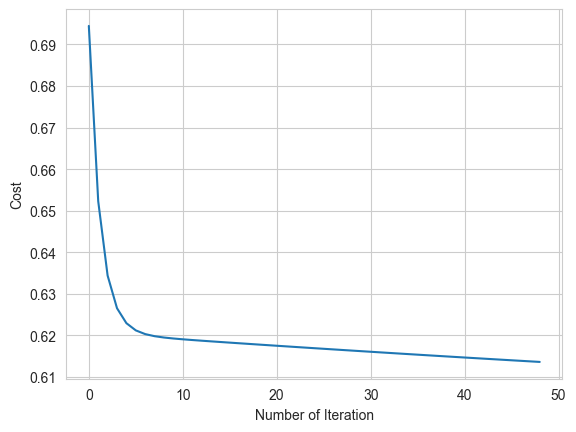

iteration: 100
cost: 0.613494299821272


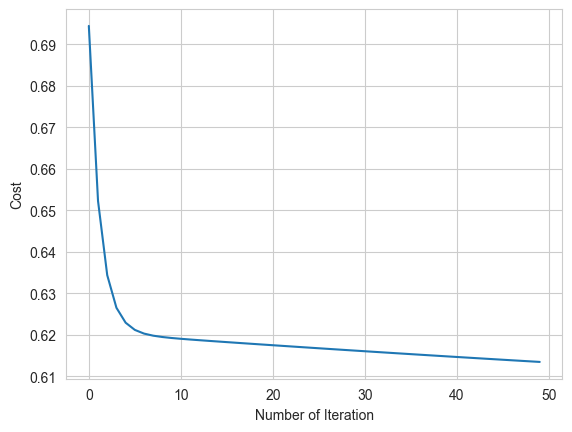

iteration: 100
cost: 0.6133649619280067


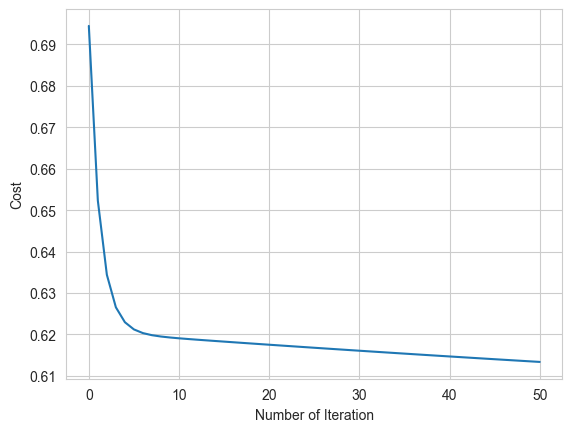

iteration: 100
cost: 0.6132362176862438


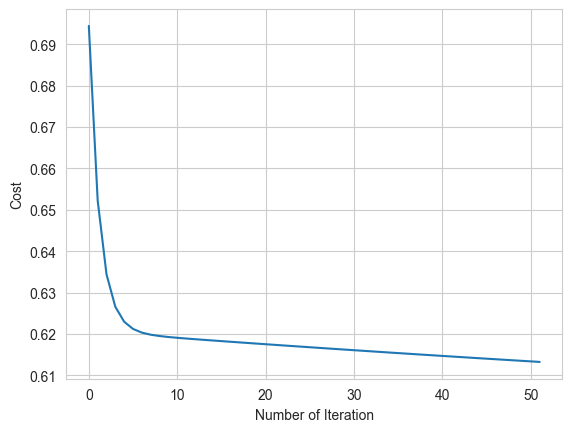

iteration: 100
cost: 0.6131080643550191


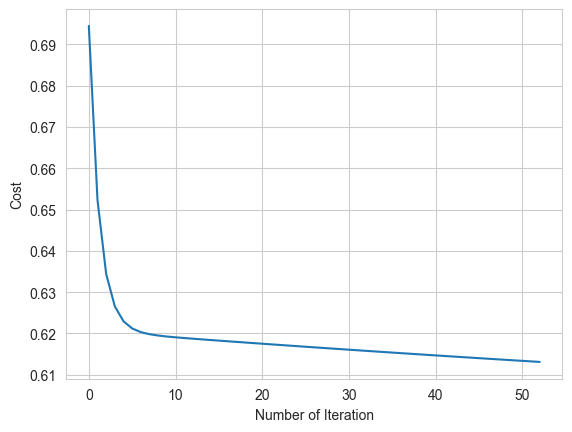

iteration: 100
cost: 0.612980499204881


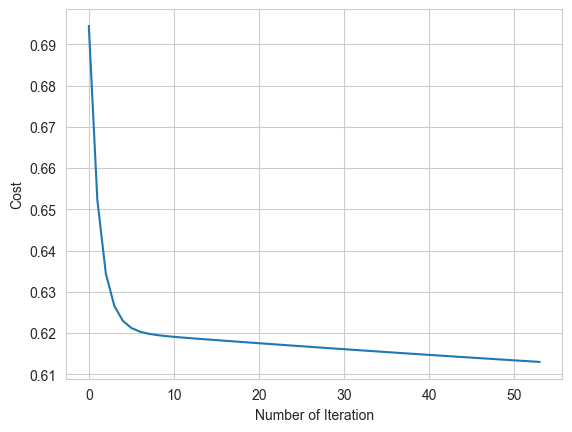

iteration: 100
cost: 0.6128535195178584


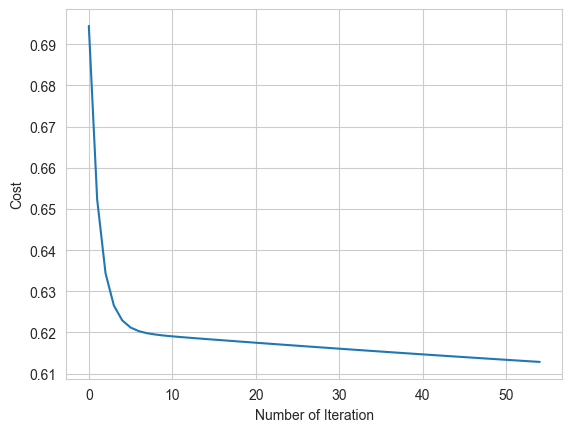

iteration: 100
cost: 0.6127271225874303


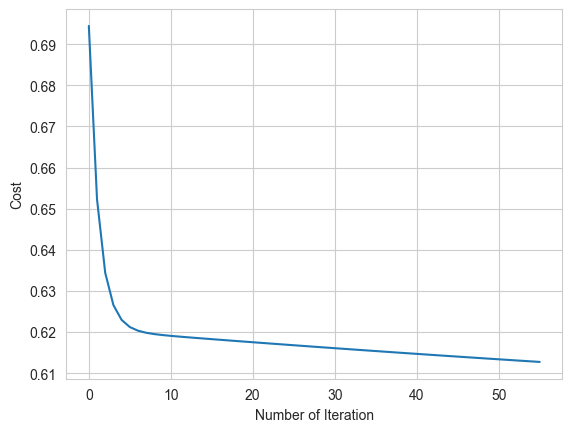

iteration: 100
cost: 0.6126013057184925


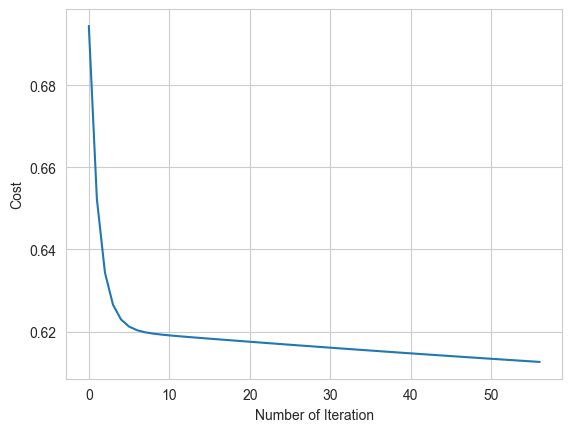

iteration: 100
cost: 0.6124760662273269


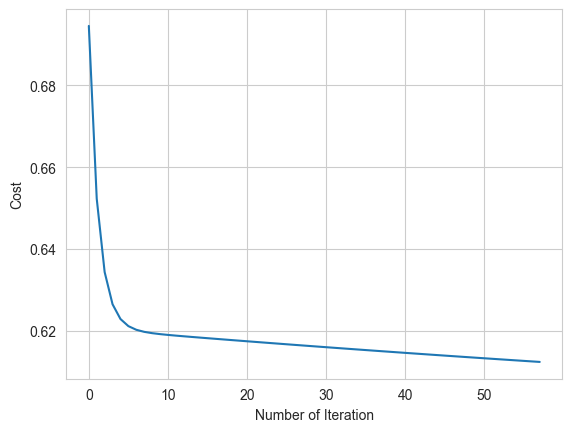

iteration: 100
cost: 0.6123514014415685


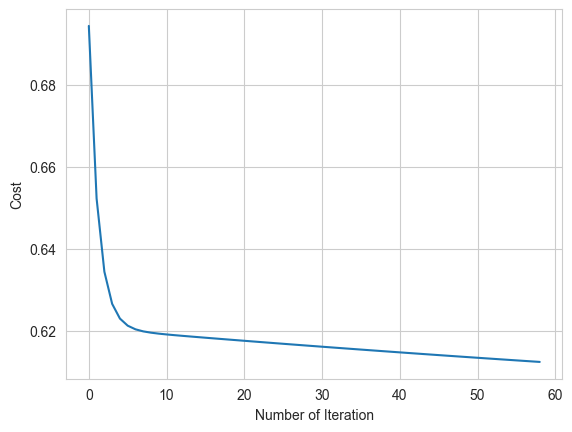

iteration: 100
cost: 0.6122273087001747


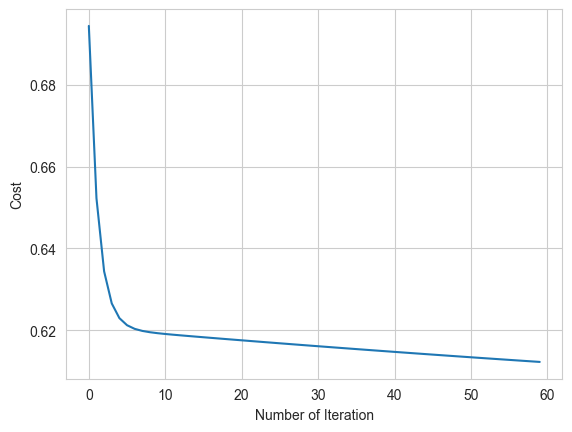

iteration: 100
cost: 0.6121037853533912


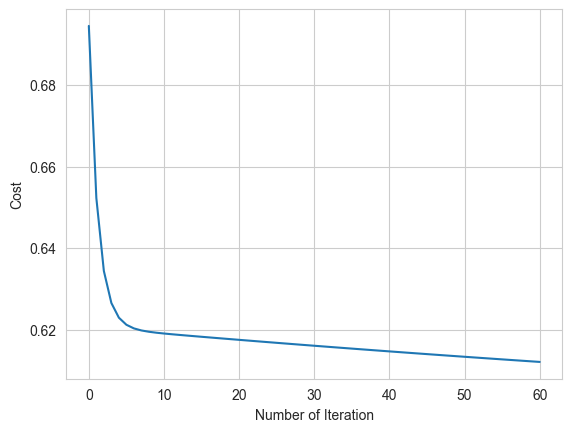

iteration: 100
cost: 0.6119808287627208


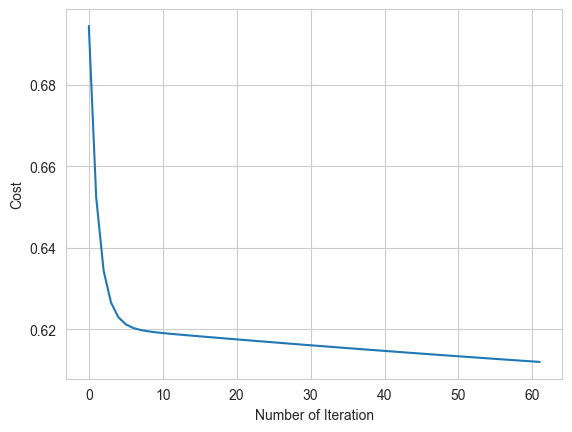

iteration: 100
cost: 0.6118584363008903


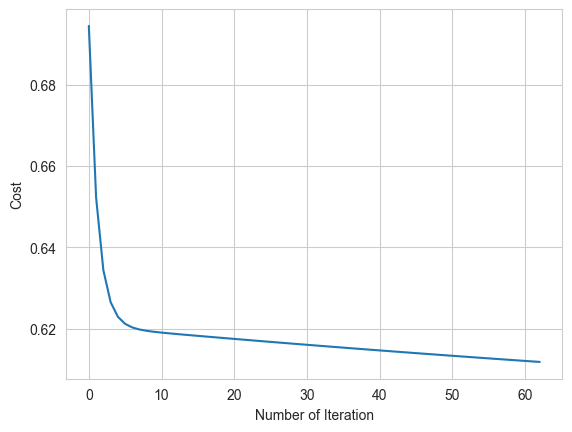

iteration: 100
cost: 0.6117366053518188


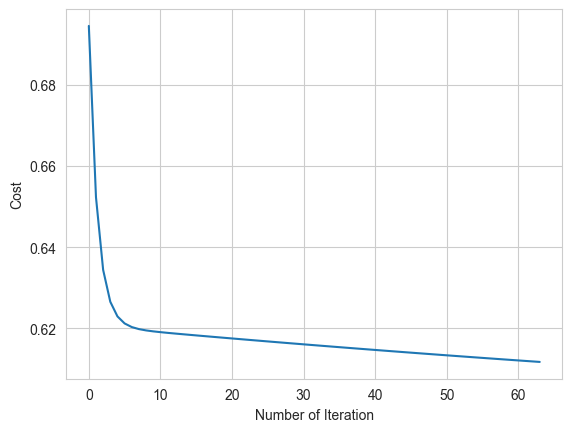

iteration: 100
cost: 0.6116153333105843


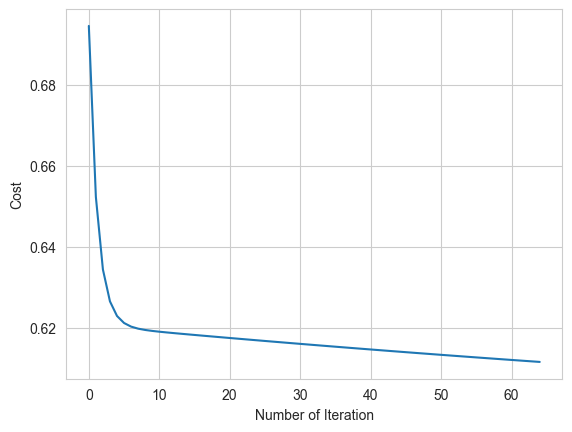

iteration: 100
cost: 0.61149461758339


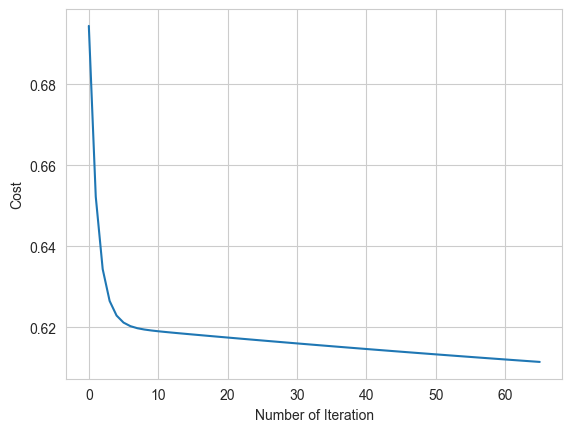

iteration: 100
cost: 0.6113744555875333


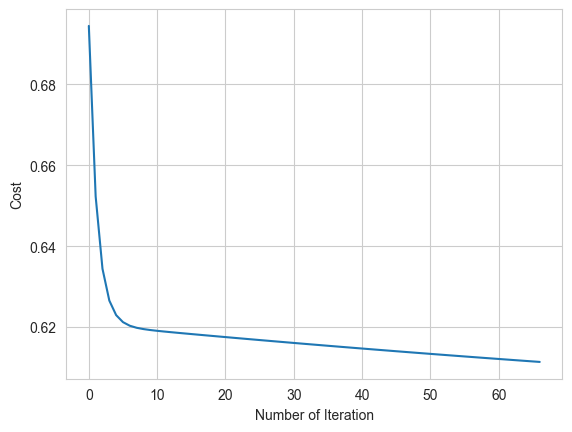

iteration: 100
cost: 0.611254844751372


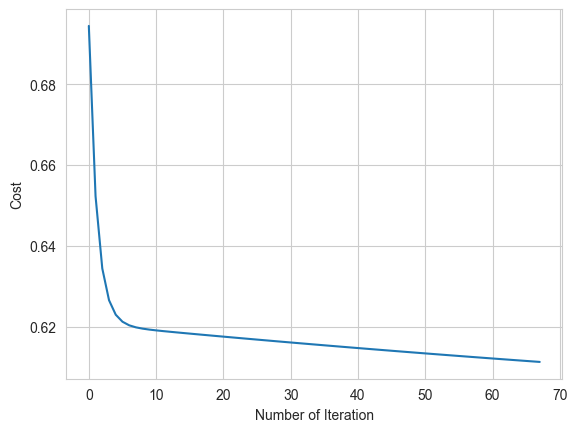

iteration: 100
cost: 0.6111357825142903


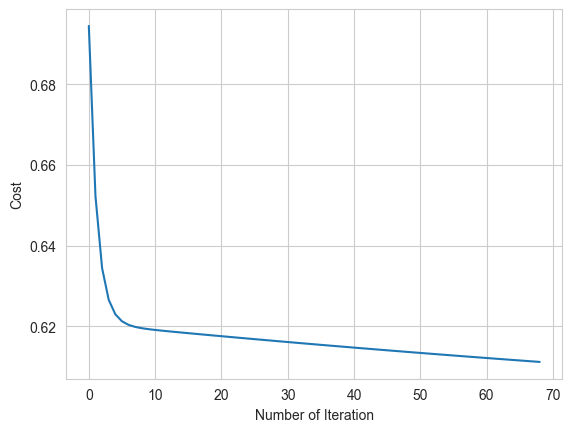

iteration: 100
cost: 0.6110172663266673


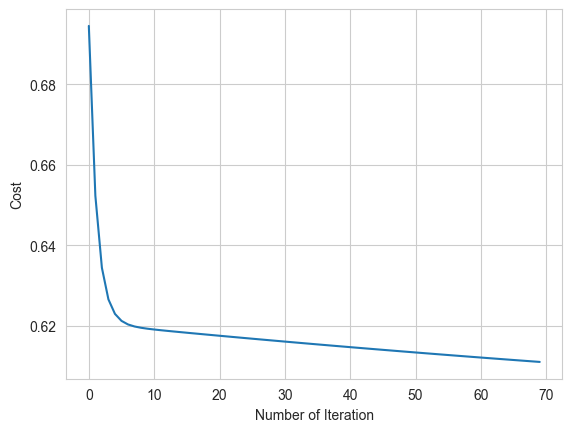

iteration: 100
cost: 0.6108992936498419


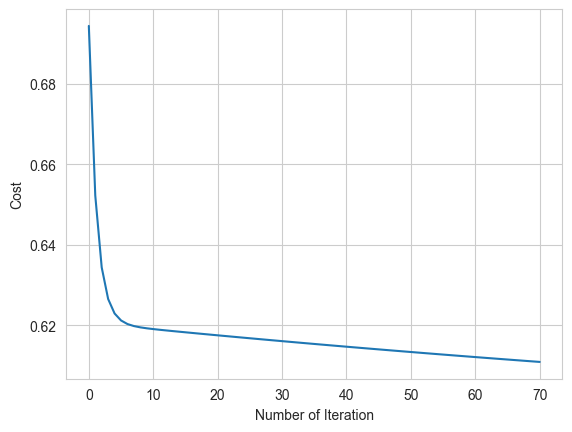

iteration: 100
cost: 0.6107818619560813


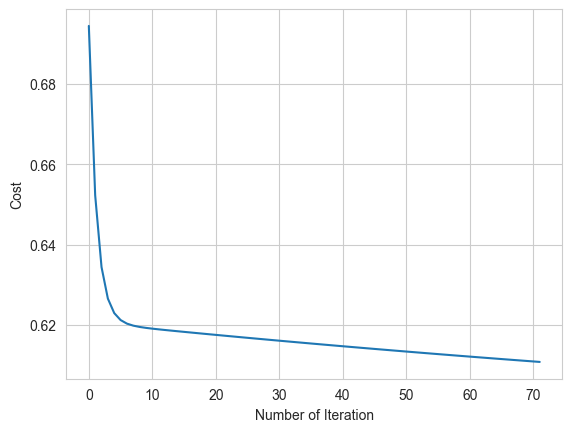

iteration: 100
cost: 0.6106649687285464


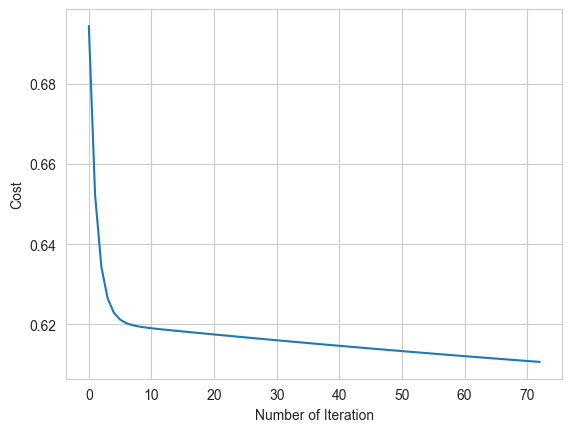

iteration: 100
cost: 0.6105486114612583


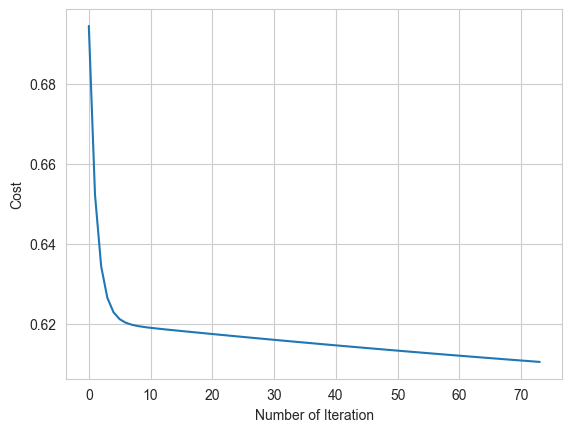

iteration: 100
cost: 0.6104327876590654


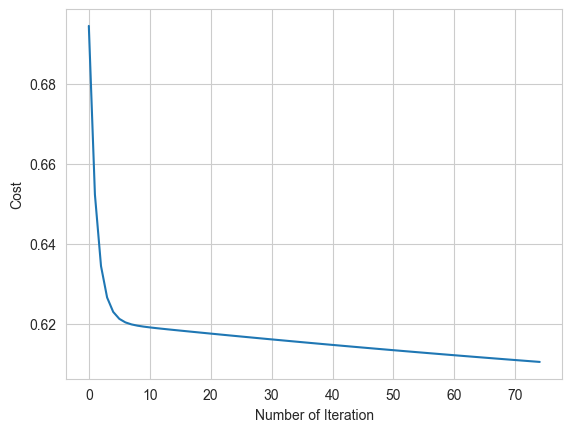

iteration: 100
cost: 0.6103174948376093


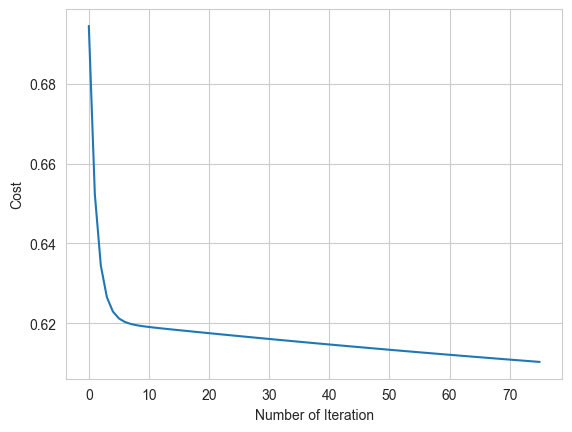

iteration: 100
cost: 0.6102027305232917


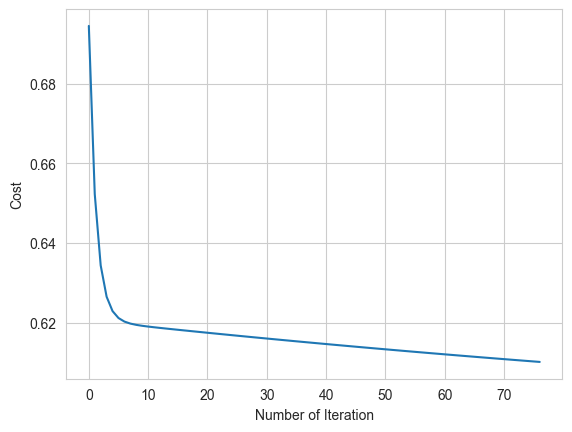

iteration: 100
cost: 0.6100884922532395


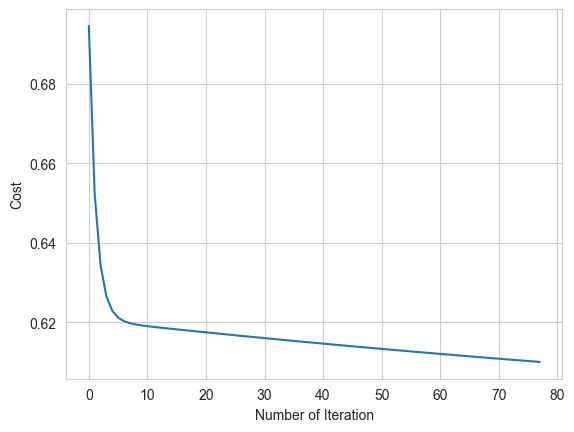

iteration: 100
cost: 0.6099747775752716


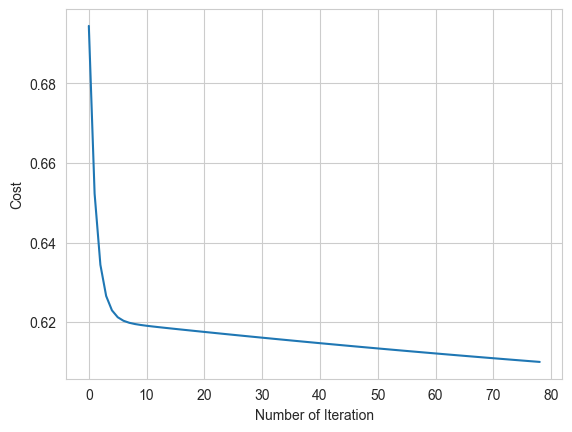

iteration: 100
cost: 0.6098615840478655


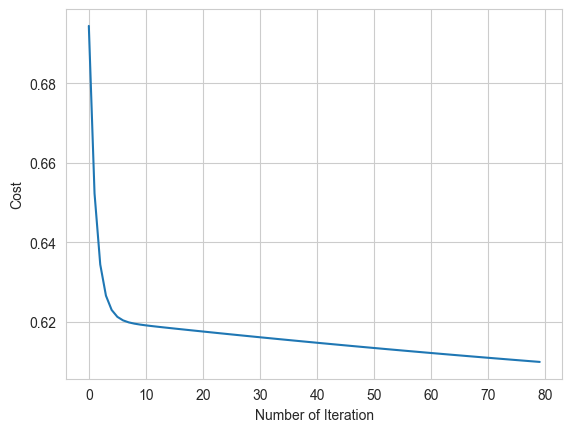

iteration: 100
cost: 0.6097489092401227


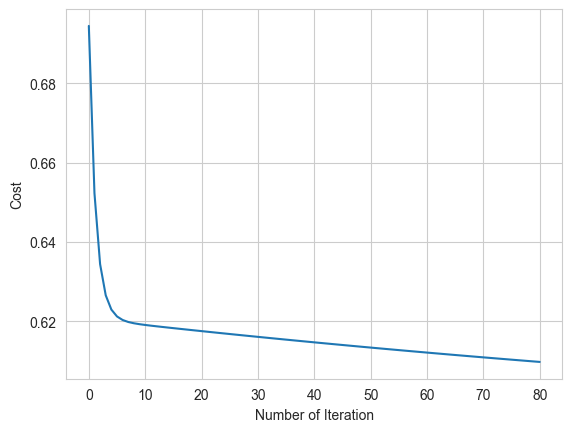

iteration: 100
cost: 0.609636750731735


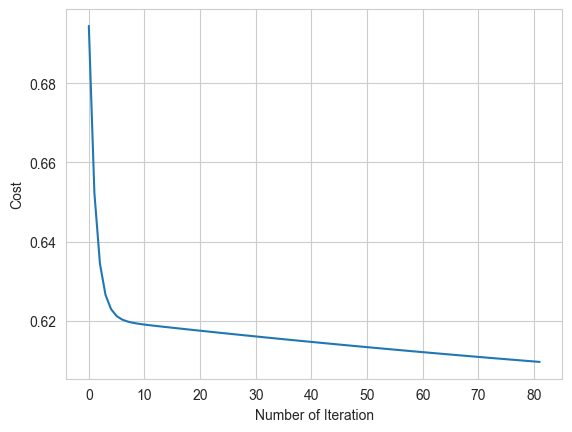

iteration: 100
cost: 0.6095251061129499


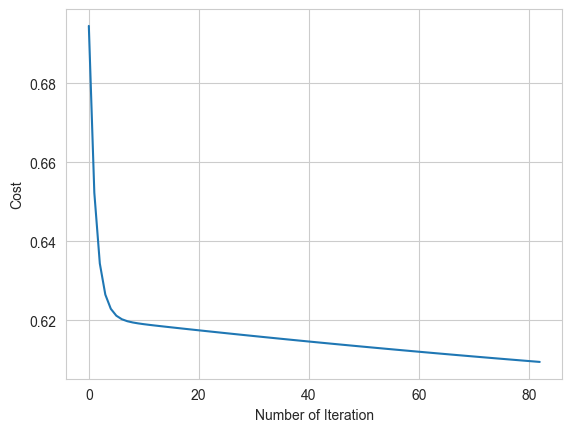

iteration: 100
cost: 0.6094139729845377


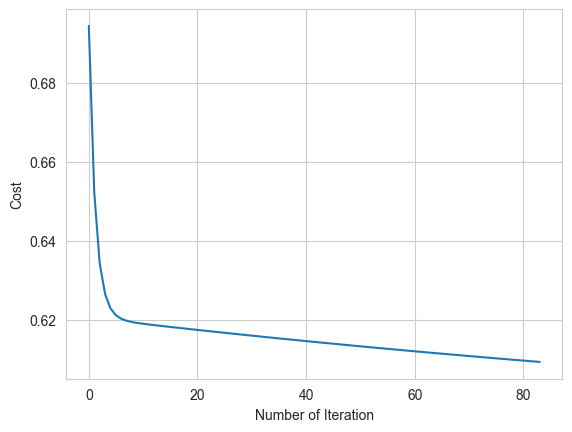

iteration: 100
cost: 0.6093033489577557


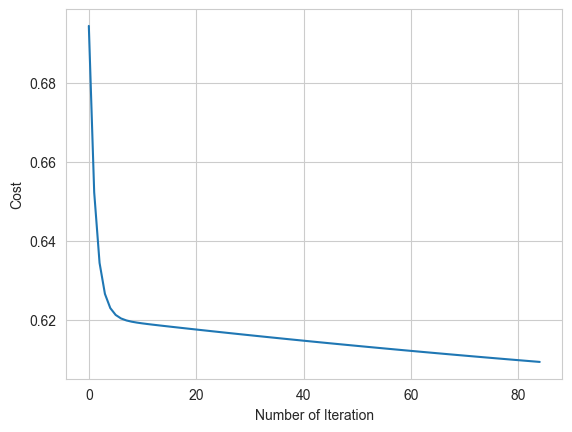

iteration: 100
cost: 0.6091932316543156


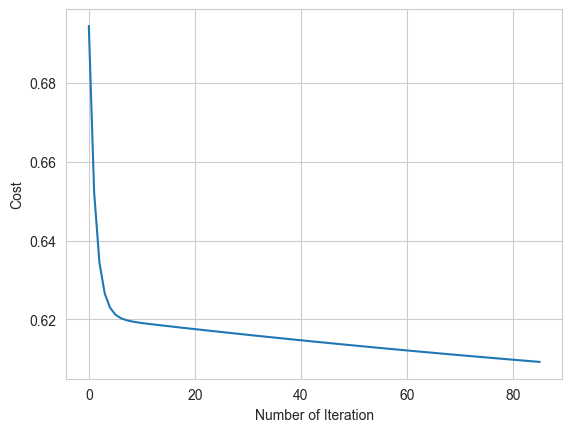

iteration: 100
cost: 0.6090836187063483


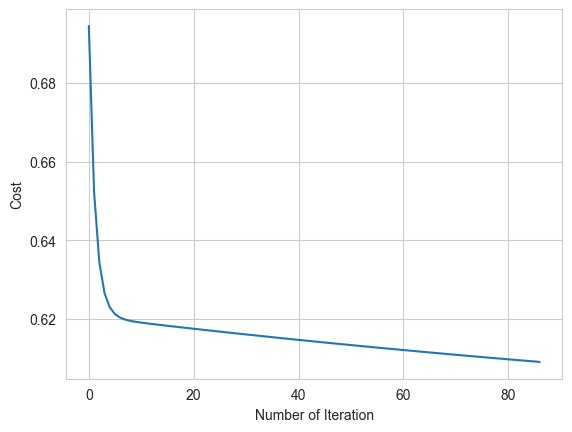

iteration: 100
cost: 0.60897450775637


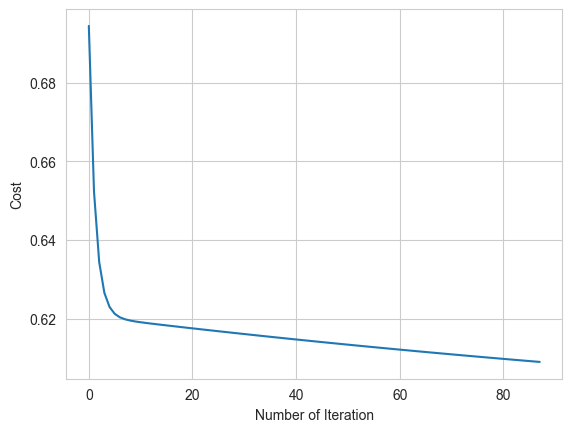

iteration: 100
cost: 0.6088658964572476


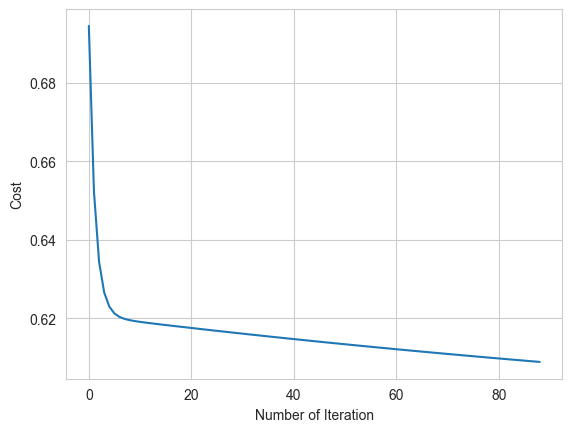

iteration: 100
cost: 0.6087577824721646


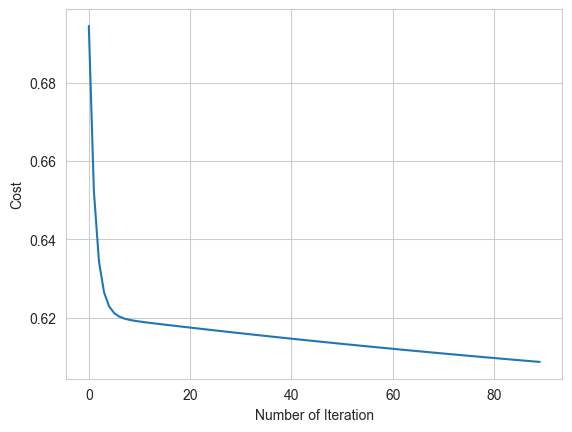

iteration: 100
cost: 0.6086501634745868


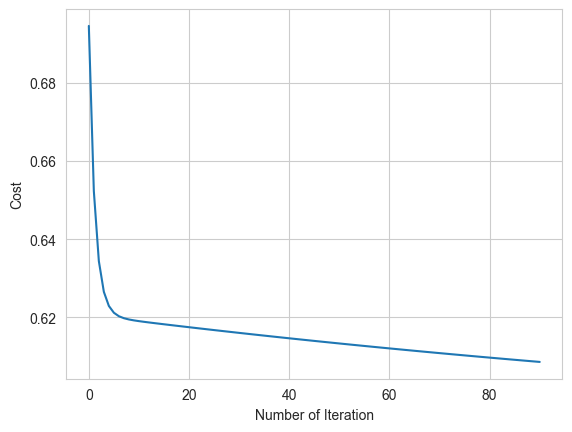

iteration: 100
cost: 0.6085430371482272


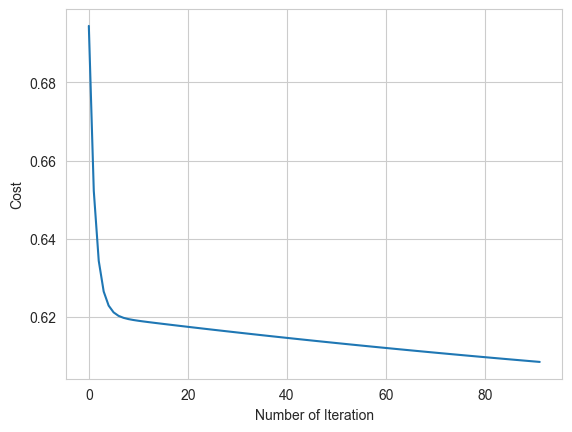

iteration: 100
cost: 0.6084364011870128


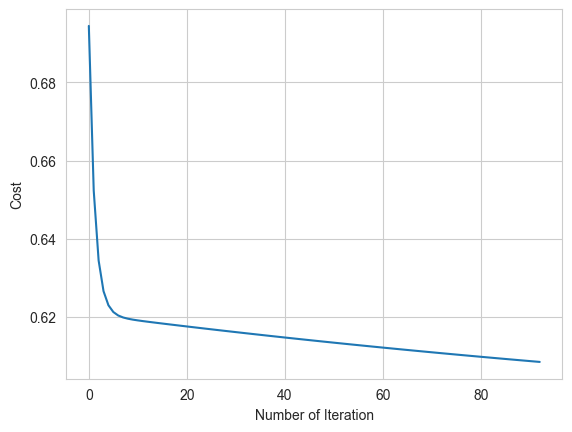

iteration: 100
cost: 0.608330253295049


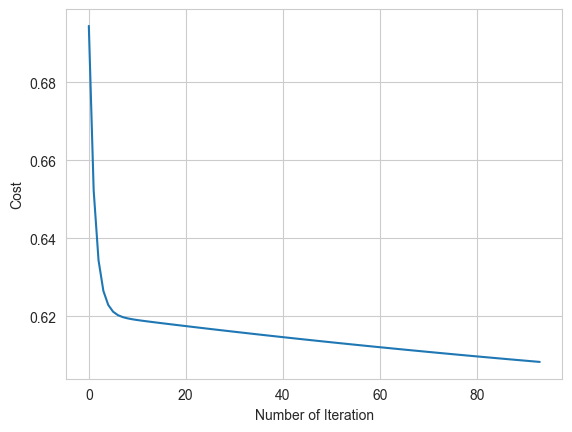

iteration: 100
cost: 0.6082245911865855


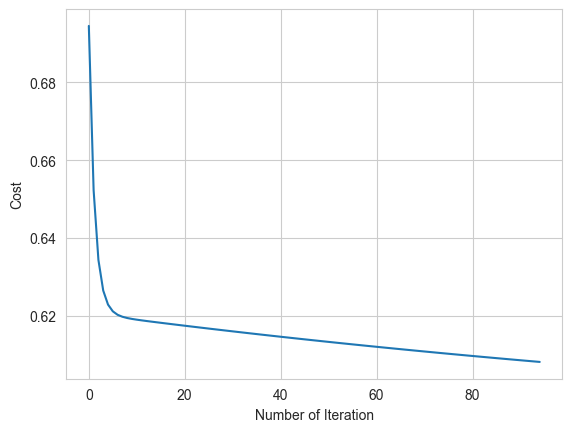

iteration: 100
cost: 0.6081194125859822


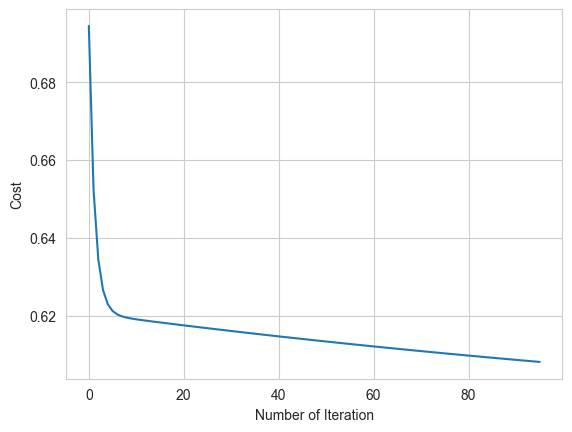

iteration: 100
cost: 0.608014715227674


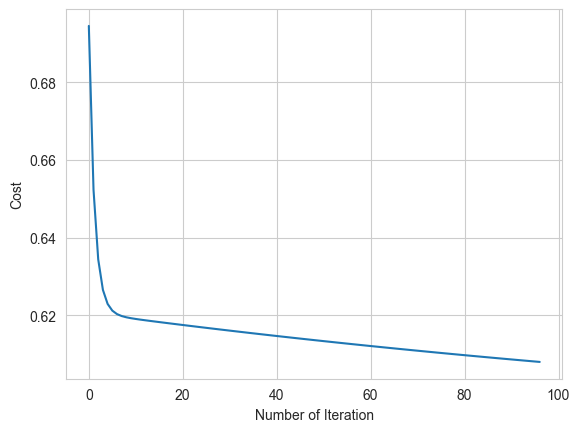

iteration: 100
cost: 0.6079104968561366


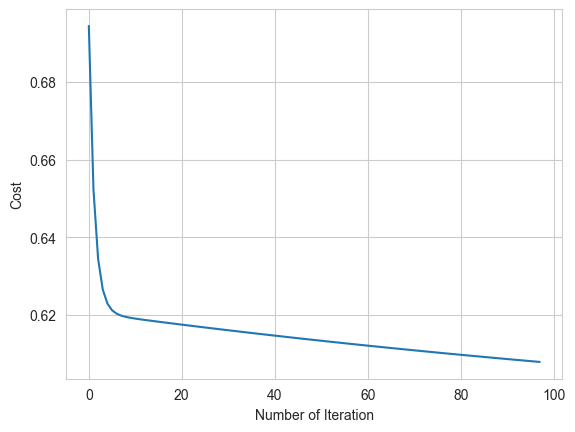

iteration: 100
cost: 0.6078067552258515


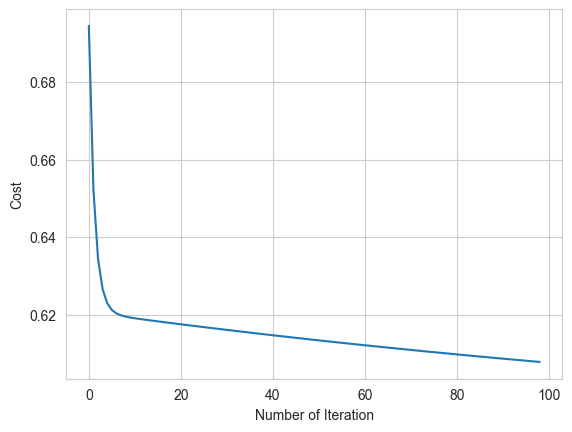

iteration: 100
cost: 0.6077034881012722


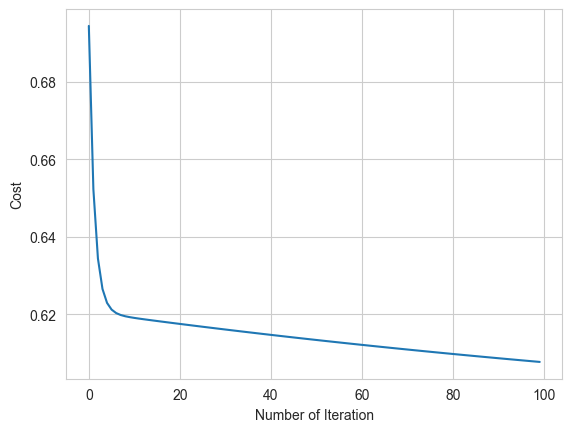

Manuel Test Accuracy: 61.67%


In [437]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients
def update(weight,bias,x_train,y_train,learningRate,iteration):
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)
        parameters = {"weight": weight,"bias": bias}
        
        print("iteration:",iteration)
        print("cost:",cost)
        plt.plot(index,costList)
        plt.xlabel("Number of Iteration")
        plt.ylabel("Cost")
        plt.show()
    return parameters, gradients
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)
    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [438]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))

Test Accuracy 61.67%


In [439]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Decision Tree Test Accuracy 70.00%


In [440]:
#Random forest classifications
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test.T,y_test.T)*100))

Random Forest Algorithm Accuracy Score : 71.67%


C:\Users\Kaushal Gangwar\AppData\Local\Temp\ipykernel_25976\2252233829.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=accuracy, palette=colors)


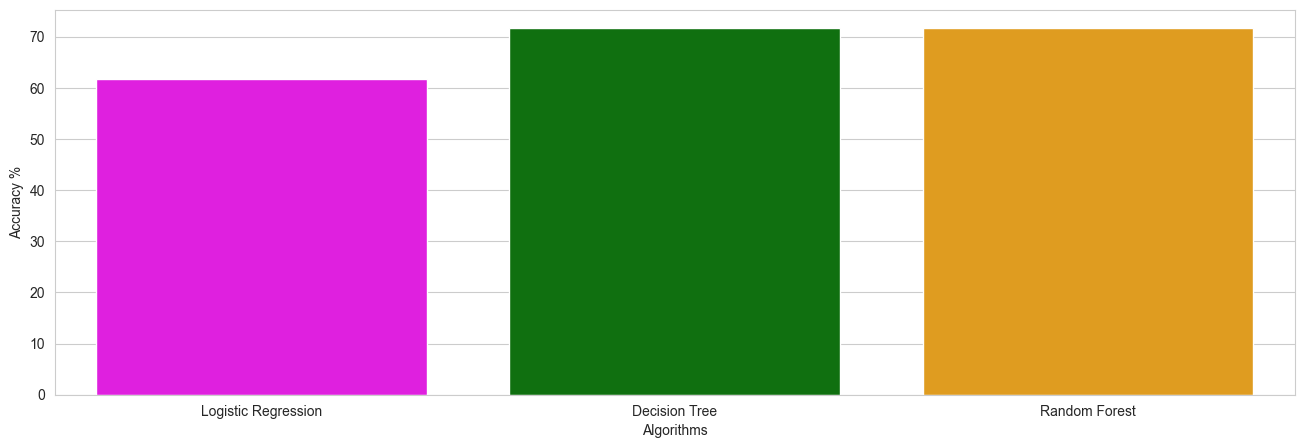

In [441]:
#Comparing Models
methods = ["Logistic Regression","Decision Tree", "Random Forest"]
accuracy = [61.67, 71.67, 71.67]
colors = ["magenta", "green", "orange"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()